In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df = pd.read_csv("../data/misgrosi_job.csv")
df_density = pd.read_excel('../../density.xlsx')

In [2]:
df.head()
df.dtypes

Position    object
Company     object
Location    object
Job Type    object
dtype: object

In [3]:
def post(row):
    try:
        post_stadt = row['Location'].split()
        if post_stadt[0].isdigit():
            val = int(post_stadt[0])
        else:
            val = None
    except:
        val = str(row['Location'])
    
    return val
        
df['Post Code'] = df.apply(post, axis=1)

In [4]:
def stadt(row):
    try:
        post_stadt = row['Location'].split()

        if len(post_stadt) == 2 :
            val = post_stadt[1]
        elif not post_stadt[0].isdigit():
            val = post_stadt[0]
        else:
            val = None
    except:
        val = None
    return val
        
df['Stadt'] = df.apply(stadt, axis=1)
df.head()

,Position,Company,Location,Job Type,Post Code,Stadt
0,"Wir suchen ein zusätzliches Grosi, das uns vor...",Daniela1984,3114 Wichtra,Kinderbetreuung allgemein,3114.0,Wichtra
1,Suchen liebevolles Grosi für langfristige Betr...,Hendrik,3037 Herrenschwanden,Tages-Grosi,3037.0,Herrenschwanden
2,Liebe Betreuung gesucht in Rorbas\nFamiliebuehrer,Familiebuehrer,8427 Rorbas,Grosi & Opi,8427.0,Rorbas
3,Grosi gesucht im Entlebuch\nMamimitHerz,MamimitHerz,6162 Entlebu,Grosi als Nanny/Haushaltshilfe,6162.0,Entlebu
4,Grosi gesucht für Kinderbetreuung in La Neuvev...,Sina 88,2520 La Neuvevill,Babysitting,2520.0,None


In [5]:
# Data group by post code
df_count = df.groupby(['Post Code']).size().reset_index(name = 'Counts')
df_count

,Post Code,Counts
0,1794.0,1
1,2000.0,2
2,2502.0,2
3,2503.0,2
4,2504.0,1
...,...,...
573,9642.0,1
574,60005.0,1
575,75059.0,1
576,79541.0,1


In [6]:
# Merge grouped by data with density.csv
df = df_count.merge(df_density,on = 'Post Code',how = 'left')
df = df.dropna(subset = ['Density'])
df['gig_per'] = 100*df['Counts']/df['Population']
# Define urban column
df['urban'] = 'unknown'
df.loc[df['Density']<400, 'urban'] = 'rural'
df.loc[(df['Density']>=400) & (df['Density']<1500), 'urban'] = 'urban'
df.loc[df['Density']>1500, 'urban'] = 'urban center'
df = df.rename(columns={'Counts': 'gig_num'})

df.head()

,Post Code,gig_num,City,Region,Population,Area,Density,gig_per,urban
0,1794.0,1,NaN,Canton of Fribourg,575.0,3.795,151.515152,0.173913,rural
1,2000.0,2,Neuchâtel,Canton of Neuchâtel,32376.0,31.600,1024.556962,0.006177,urban
2,2502.0,2,NaN,Canton of Bern,16911.0,6.400,2642.343750,0.011827,urban center
3,2503.0,2,NaN,Canton of Bern,14239.0,2.954,4820.243737,0.014046,urban center
4,2504.0,1,NaN,Canton of Bern,23332.0,9.700,2405.360825,0.004286,urban center


In [7]:
# Count job number of urban center, urban and rural 
urban_count = df.groupby('urban')['urban'].count()
urban_count

urban
rural           216
urban           238
urban center    114
Name: urban, dtype: int64

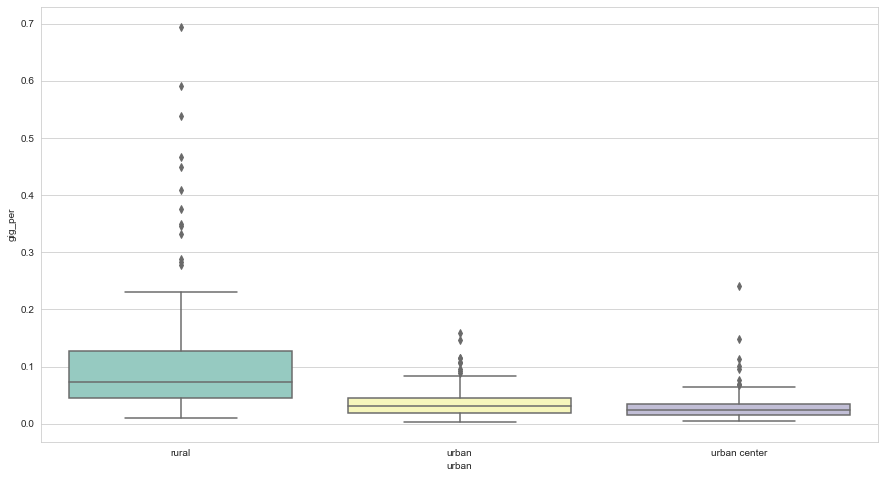

In [8]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="urban", y="gig_per",               
data=df, palette="Set3")

In [9]:
urban = df[df["urban"]=='urban']['gig_per']
urban_center = df[df["urban"]=='urban center']['gig_per']
rural = df[df["urban"]=='rural']['gig_per']

In [10]:
def hist_data(data):
    plt.hist(data, color = 'c', edgecolor='black',alpha=0.65,bins = 20)
    plt.axvline(data.mean(), color='r', linestyle='dashed', linewidth=1)
    plt.axvline(data.median(), color='b', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(data.mean()*1.06, max_ylim*0.9, 'Mean: {:.2f}'.format(data.mean()))  

In [11]:
def hist_all(labels,*data):
    plt.figure(figsize=(17,8))
    i = 0
    op = 0.7
    c = list(mcolors.BASE_COLORS.keys())
    plt.hist(data,color = c[:len(labels)], alpha=op-i*0.2,bins = 25, label = labels, range = [0,0.75])
    plt.xlabel('percentage of gig workers')
    plt.title(' vs. '.join(labels)+' histogram')
    plt.legend()
    plt.show()

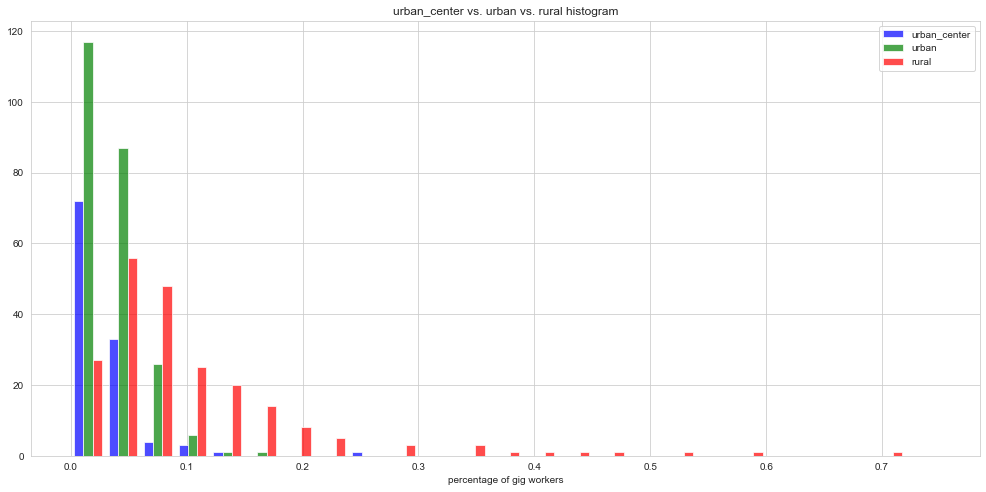

In [12]:
hist_all(['urban_center','urban','rural'],urban_center,urban,rural)

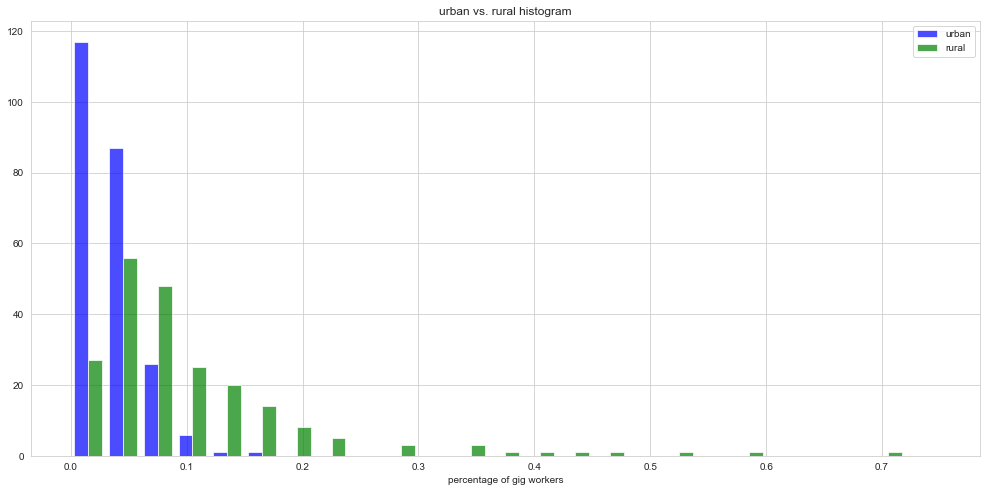

In [13]:
hist_all(['urban','rural'],urban,rural)

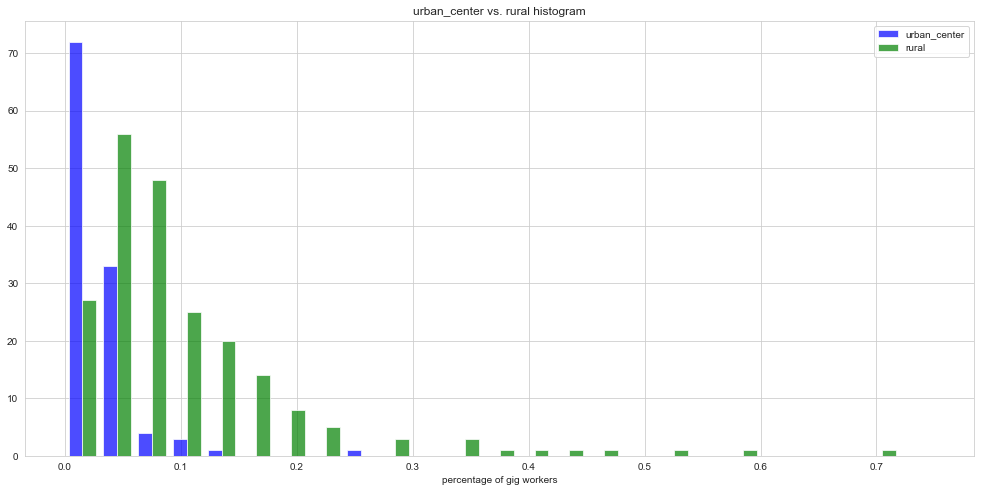

In [14]:
hist_all(['urban_center','rural'],urban_center,rural)

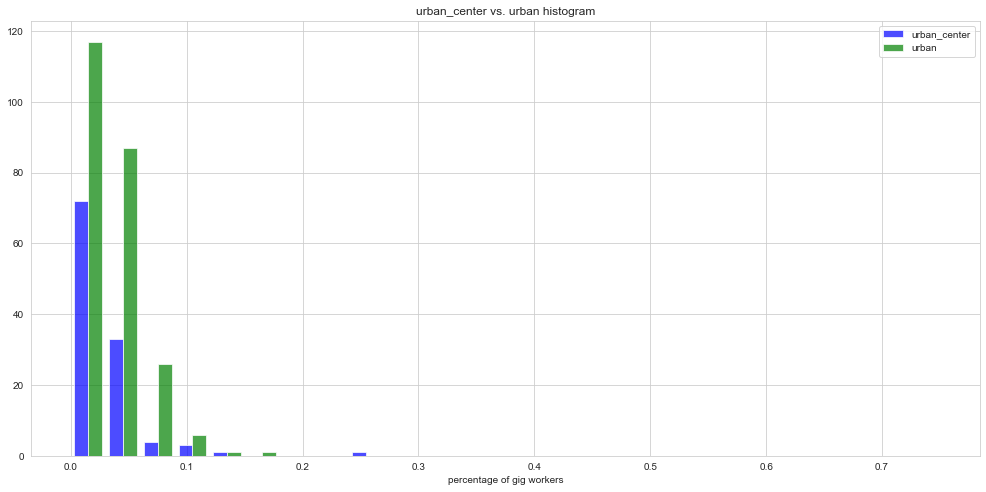

In [15]:
hist_all(['urban_center','urban'],urban_center,urban)

In [16]:
df_count = df_density.merge(df_count,on = 'Post Code', how = 'left')
df_count['Counts'] = df_count['Counts'].fillna(0)
df_count = df_count.drop(['City','Region'],axis=1)
df_count = df_count.dropna(subset = ['Density','Population'])
df_count['gig_per'] = 100*df_count['Counts']/df_count['Population']
df_count = df_count.rename(columns={'Counts': 'gig_num'})
df_count

,Post Code,Population,Area,Density,gig_num,gig_per
0,1000,8157.0,14.100,578.510638,0.0,0.0
3,1003,7617.0,0.820,9289.024390,0.0,0.0
4,1004,19375.0,2.272,8527.728873,0.0,0.0
5,1005,10355.0,1.585,6533.123028,0.0,0.0
6,1006,11538.0,1.553,7429.491307,0.0,0.0
...,...,...,...,...,...,...
3517,9411,744.0,5.100,145.882353,0.0,0.0
3519,9426,921.0,1.381,666.908038,0.0,0.0
3520,9427,1517.0,6.900,219.855072,0.0,0.0
3521,9428,1971.0,7.000,281.571429,0.0,0.0


In [17]:
def draw_worker_density(xv,yv,df):
    plt.figure(figsize=(10, 6), dpi=80)
    ax = sns.scatterplot(x=xv, y=yv, data=df)
    ax.set_title(yv+" vs. "+xv)
    ax.set_xlabel(xv)

In [18]:
from scipy import stats
def draw_corr(df,col1, col2):
    draw_worker_density(col1,col2,df)
    p = stats.pearsonr(df[col1], df[col2])
    s = stats.spearmanr(df[col1], df[col2])
    k = stats.kendalltau(df[col1], df[col2])
    print(f'pearson r: {p[0]}, p value: {p[1]}')
    print(f'Spearman rho: {s[0]}, p value: {s[1]}')
    print(f'kendall tau: {k[0]}, p value: {k[1]}')

pearson r: -0.28148025775698055, p value: 8.356918924215233e-12
Spearman rho: -0.6351800268951012, p value: 1.6928677363562617e-65
kendall tau: -0.4578006467003952, p value: 7.79212097471365e-60


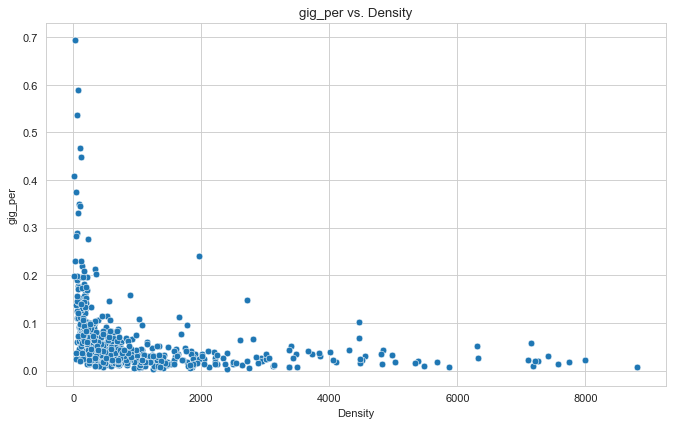

In [19]:
draw_corr(df,'Density','gig_per')

pearson r: 0.024094516816665128, p value: 0.17652529051625415
Spearman rho: 0.3700935646291699, p value: 8.977907571513475e-103
kendall tau: 0.28017660221943425, p value: 3.0846793184281726e-90


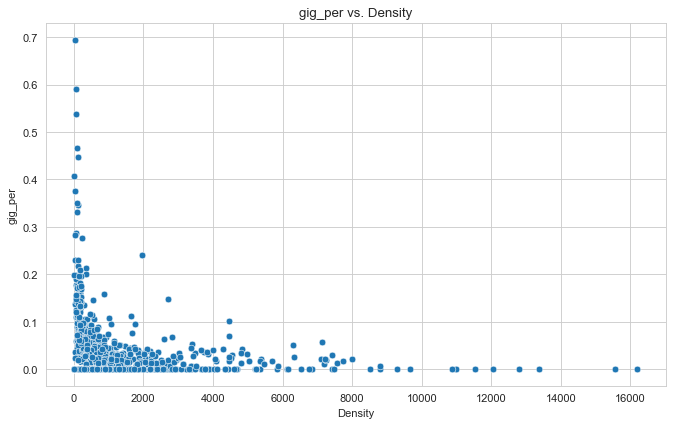

In [20]:
draw_corr(df_count,'Density','gig_per')